In [18]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

import gudhi as gd

In [3]:
# Load in data
grid = gpd.read_file('./data/rectGrid_200RectsSmallSide.geojson')

In [4]:
grid.head()

,val,geometry
0,0.0,"POLYGON ((427548.14418 4609444.67055, 427687.3..."
1,0.0,"POLYGON ((427548.14418 4609583.89052, 427687.3..."
2,0.0,"POLYGON ((427548.14418 4609723.11049, 427687.3..."
3,0.0,"POLYGON ((427548.14418 4609862.33047, 427687.3..."
4,0.0,"POLYGON ((427548.14418 4610001.55044, 427687.3..."


In [5]:
grid.describe()

,val
count,67624.000000
mean,691.743157
std,1045.252908
min,0.000000
25%,0.000000
50%,0.000000
75%,1244.905642
max,6947.305000


<Axes: >

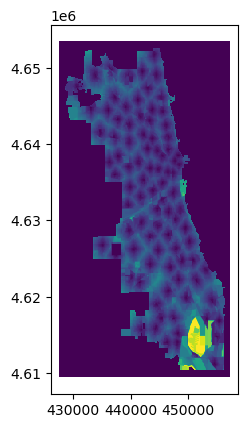

In [6]:
grid.plot('val')

In [7]:
grid_cents = grid.centroid
grid_cents

C:\Users\aance\AppData\Local\Temp\ipykernel_33584\2501546813.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  grid_cents = grid.centroid


0        POINT (427617.75417 4609514.28053)
1        POINT (427617.75417 4609653.50051)
2        POINT (427617.75417 4609792.72048)
3        POINT (427617.75417 4609931.94045)
4        POINT (427617.75417 4610071.16042)
                        ...                
67619    POINT (457271.60834 4652811.69202)
67620    POINT (457271.60834 4652950.91199)
67621    POINT (457271.60834 4653090.13197)
67622    POINT (457271.60834 4653229.35194)
67623    POINT (457271.60834 4653368.57191)
Length: 67624, dtype: geometry

In [8]:
# get dimensions of the grid (as in, number of rows and columns)
nx = grid_cents.x.nunique()
ny = grid_cents.y.nunique()

# sanity check
assert nx * ny == len(grid)

In [9]:
# construct the cubical complex, using the grid values for the sublevel set filtration
# The following two websites might be helpful for this:
#     * https://gudhi.inria.fr/python/latest/cubical_complex_user.html
#     * https://github.com/GUDHI/TDA-tutorial/blob/master/Tuto-GUDHI-cubical-complexes.ipynb

cubicalComplex = gd.CubicalComplex(
    dimensions=(nx,ny),
    top_dimensional_cells = grid['val']
)

In [10]:
print(cubicalComplex.dimension())
print(cubicalComplex.num_simplices())

2
271557


In [11]:
barCodes = cubicalComplex.persistence()

C:\Users\aance\anaconda3\envs\geoTda\Lib\site-packages\gudhi\persistence_graphical_tools.py:105: UserWarning: This function is not available.
ModuleNotFoundError: No module named 'matplotlib'.
  warnings.warn(f"This function is not available.\nModuleNotFoundError: No module named '{import_error.name}'.")


<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

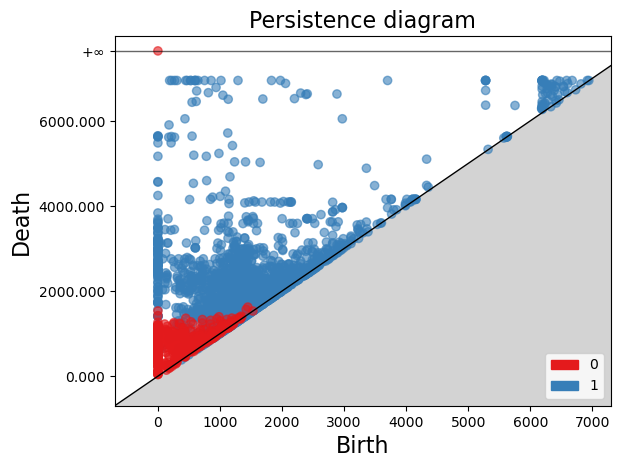

In [12]:
# create persistance diagram from the cubical complex
gd.plot_persistence_diagram(barCodes)

In [13]:
# print the barcode information (the elements of the list are in the form (homology #, (birth, death)) iirc)
barCodes

[(1, (189.0893240631835, 6947.305)),
 (1, (221.98226681558884, 6947.305)),
 (1, (269.0836019575703, 6947.305)),
 (1, (307.9717384781715, 6947.305)),
 (1, (448.03361451856443, 6947.305)),
 (1, (470.79241416081715, 6947.305)),
 (1, (524.750765136529, 6947.305)),
 (1, (530.646241539321, 6947.305)),
 (1, (595.2361923245826, 6947.305)),
 (1, (595.9820196247622, 6947.305)),
 (1, (609.6134710583934, 6947.305)),
 (1, (644.3823872126936, 6947.305)),
 (1, (751.8127445551786, 6947.305)),
 (1, (857.8591398633049, 6947.305)),
 (1, (624.3424751082176, 6701.755331120877)),
 (1, (1016.0032581262838, 6947.305)),
 (1, (550.0041758887093, 6435.921239762255)),
 (1, (812.7189773900202, 6661.109815771525)),
 (1, (936.5085588211283, 6783.5338903169995)),
 (1, (616.362932210418, 6455.280485848943)),
 (1, (178.90399514721338, 5902.954307978447)),
 (1, (1290.106, 6947.305)),
 (1, (0.0, 5646.861385143403)),
 (1, (0.0, 5637.346673105977)),
 (1, (0.0, 5632.875805628617)),
 (1, (0.0, 5619.502358025027)),
 (1, (435.

In [16]:
# do a little analysis of the births and deaths in pandas

import pandas as pd
flat = [[x[0],x[1][0],x[1][1]] for x in barCodes]
df = pd.DataFrame(data=flat,columns=['hom','b','d'])
df

,hom,b,d
0,1,189.089324,6947.305000
1,1,221.982267,6947.305000
2,1,269.083602,6947.305000
3,1,307.971738,6947.305000
4,1,448.033615,6947.305000
...,...,...,...
2715,0,932.009000,935.516443
2716,0,882.669773,886.037640
2717,0,1127.461706,1128.181766
2718,0,286.827370,287.032193


{'whiskers': [<matplotlib.lines.Line2D at 0x23fb38843b0>,
 'caps': [<matplotlib.lines.Line2D at 0x23fb3886540>,
 'boxes': [<matplotlib.lines.Line2D at 0x23fb3947d10>],
 'medians': [<matplotlib.lines.Line2D at 0x23fb4d4c7d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23fb4d4cf50>],
 'means': []}

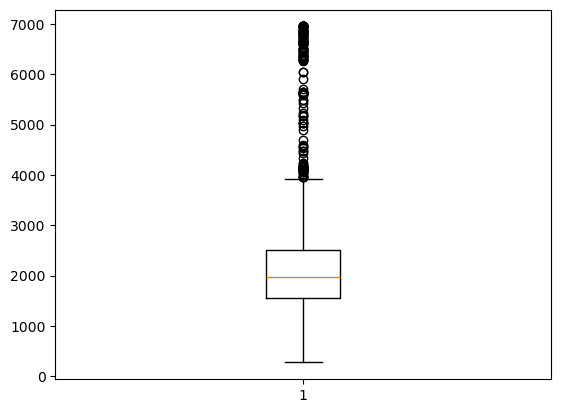

In [19]:
plt.boxplot(df.loc[df['hom'] == 1,'d'])
# df[df['hom'] == 1]

In [22]:
q1,q3 = df.loc[df['hom'] == 1,'d'].quantile([0.25,0.75])
iqr = q3-q1
upLim = q3 + 1.5*iqr
print(q1,q3,upLim)
df.loc[(df['hom'] == 1) & (df['d'] > upLim)].shape

1550.0896631751693 2499.8988016539233 3924.6125093720543


(184, 3)

In [23]:
df.loc[df['hom'] == 1,'d'].describe()

count    2274.000000
mean     2269.394392
std      1248.164343
min       275.341793
25%      1550.089663
50%      1966.146362
75%      2499.898802
max      6947.305000
Name: d, dtype: float64